In [2]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 20  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

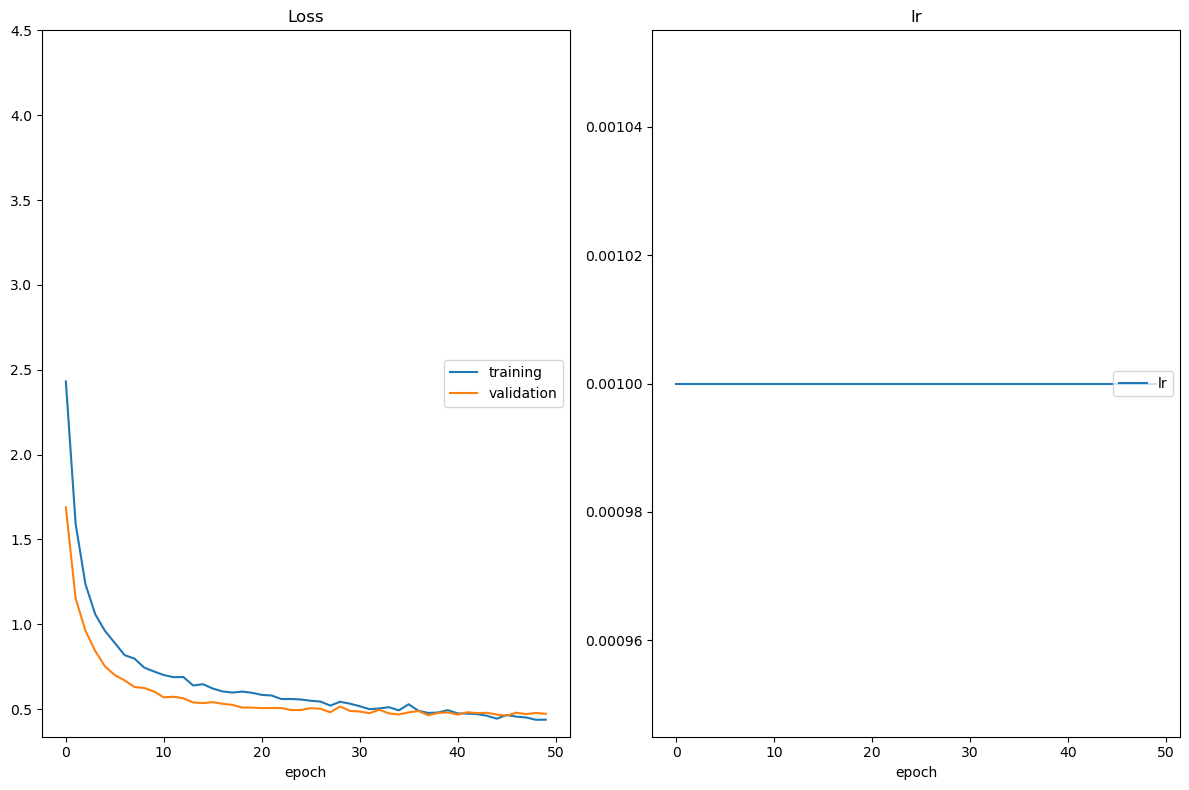

In [12]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet18", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer18.pt",
    interactive_tracking=True
)

In [13]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer18.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 62 groups of parameters


Testing: 100%|██████████████████████████████████| 11/11 [00:24<00:00,  2.22s/it]

Test Loss: 0.431710


Test Accuracy: 87% (596/685)


0.43170996755361557

In [14]:
from PredictorWrapper import Predictor
from Data import compute_mean_and_std, get_data_loaders

# First let's get the class names from our data loaders
class_names = get_data_loaders()["train"].dataset.classes

model_transfer = model_transfer.cpu()
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer18.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported18.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


100%|█████████████████████████████████████████| 685/685 [00:34<00:00, 19.97it/s]
/home/dkafetzis/.conda/envs/deep-learning-landmark-classification/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Accuracy: 0.872992700729927


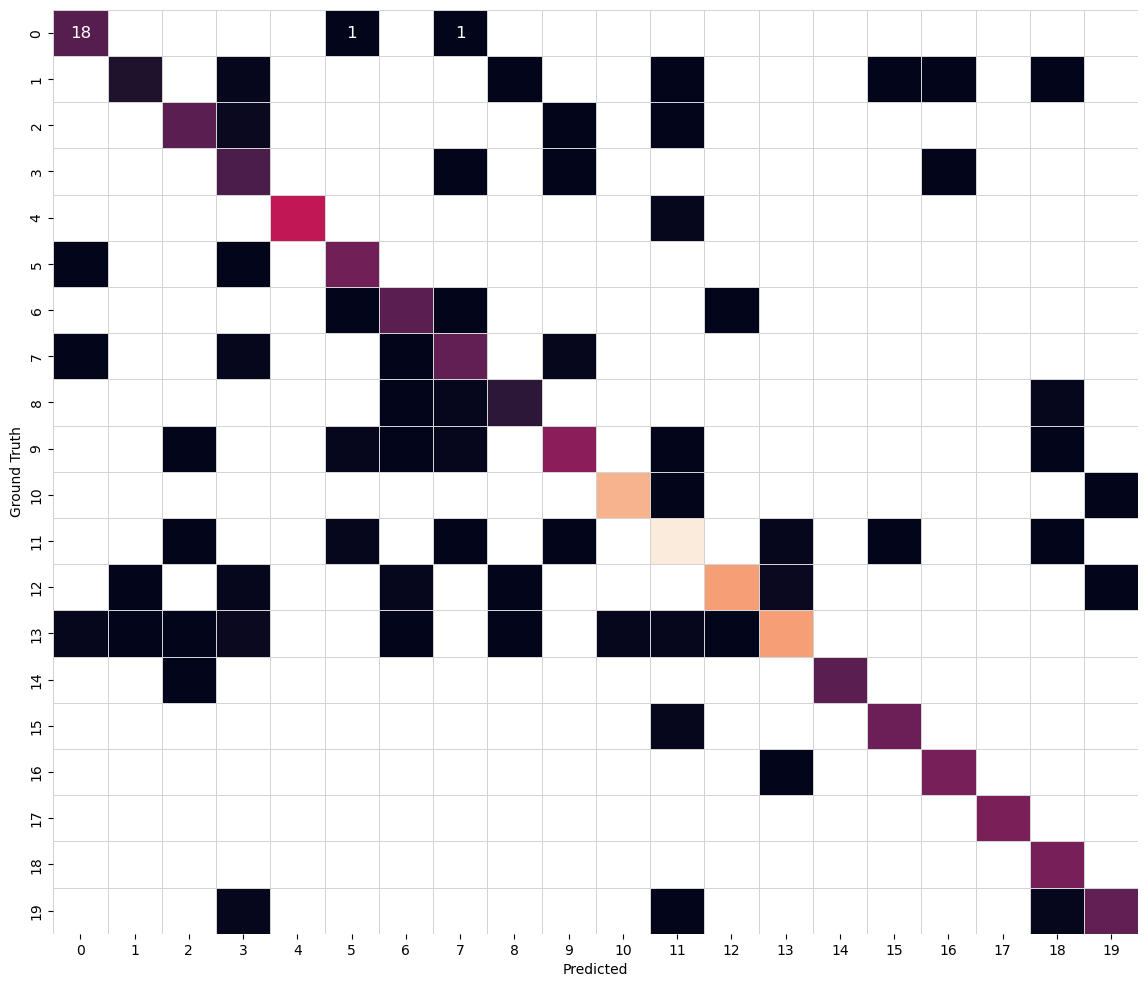

In [15]:
import torch
from PredictorWrapper import predictor_test
from Data import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported18.pt")

pred, truth = predictor_test(get_data_loaders()['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

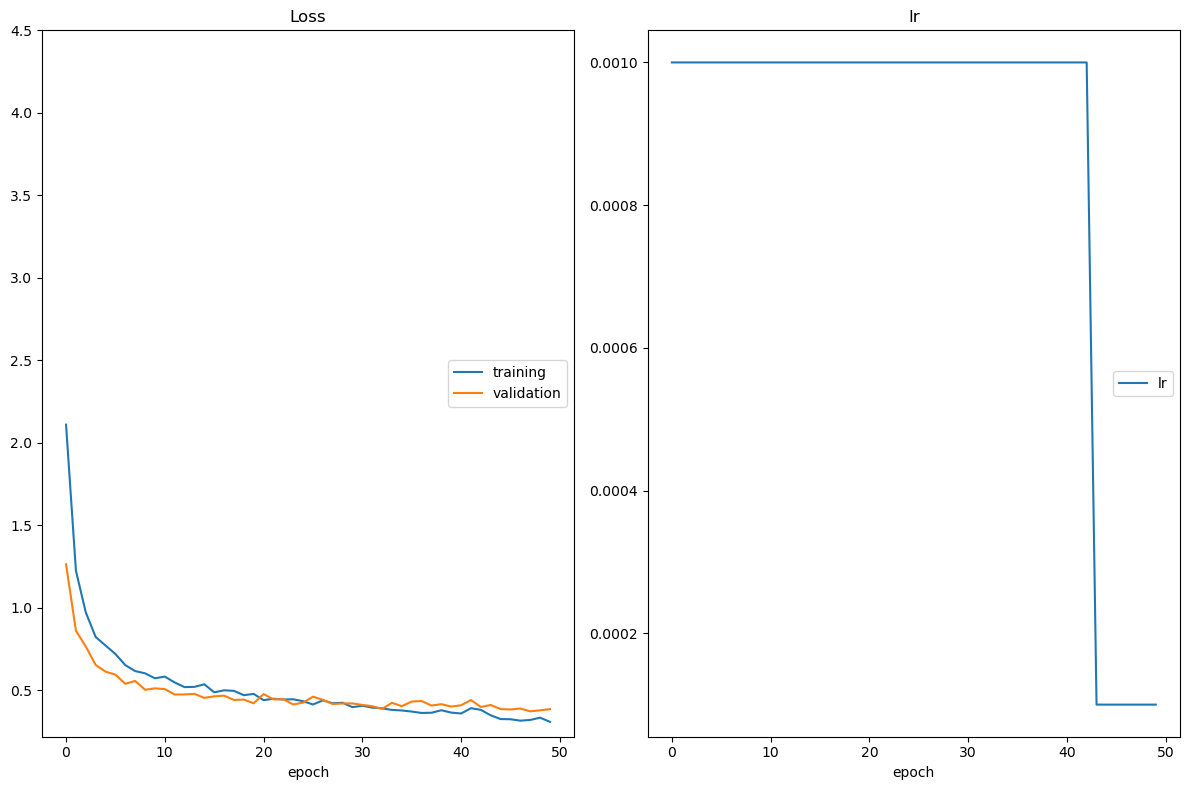

In [4]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet50", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer50.pt",
    interactive_tracking=True
)

In [5]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet50", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer50.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 161 groups of parameters


Testing: 100%|██████████████████████████████████| 11/11 [00:24<00:00,  2.21s/it]

Test Loss: 0.372051


Test Accuracy: 90% (620/685)


0.37205072390762245

In [6]:
from PredictorWrapper import Predictor
from Data import compute_mean_and_std, get_data_loaders

# First let's get the class names from our data loaders
class_names = get_data_loaders()["train"].dataset.classes

model_transfer = model_transfer.cpu()
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer50.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported50.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


100%|█████████████████████████████████████████| 685/685 [00:42<00:00, 15.95it/s]


Accuracy: 0.9051094890510949


/home/dkafetzis/.conda/envs/deep-learning-landmark-classification/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


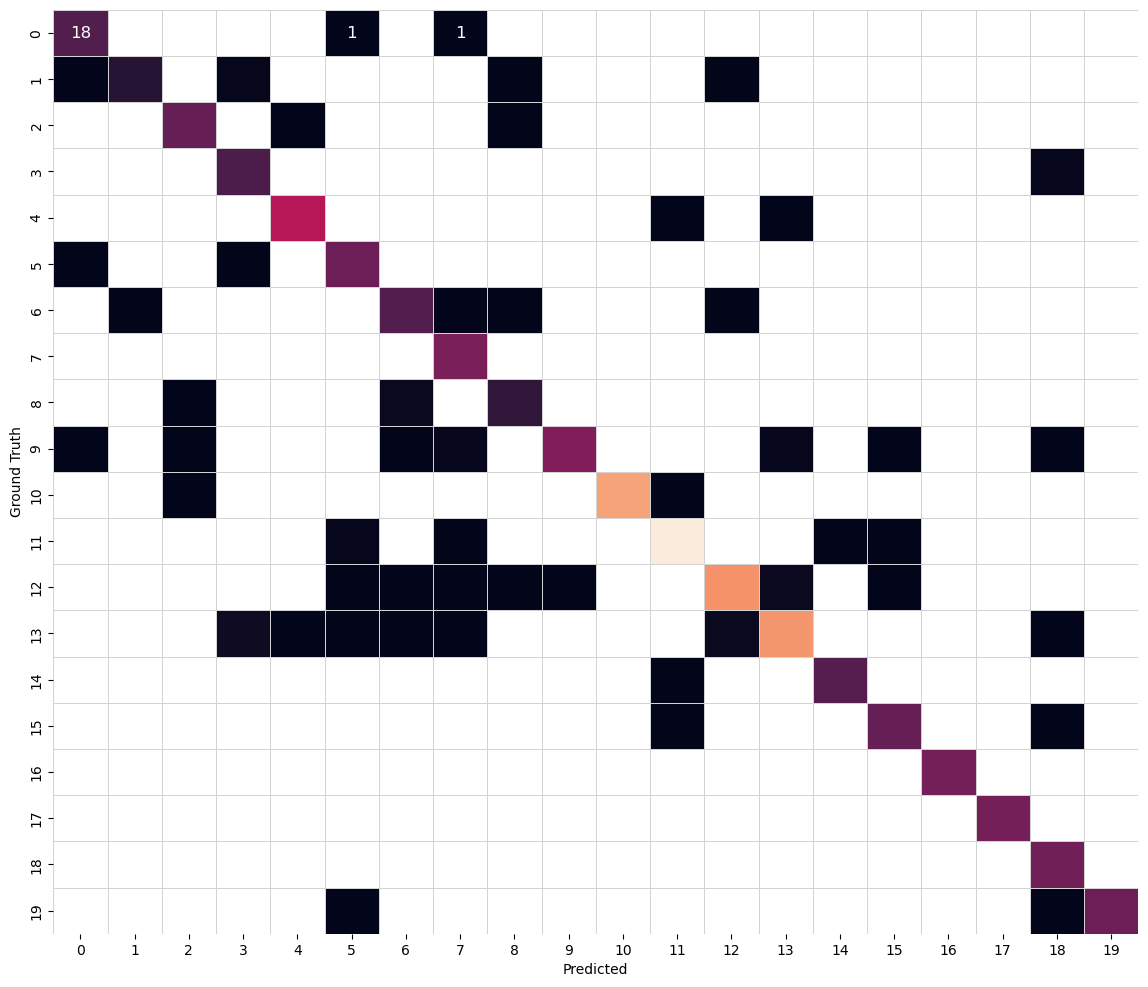

In [7]:
import torch
from PredictorWrapper import predictor_test
from Data import plot_confusion_matrix


model_reloaded = torch.jit.load("checkpoints/transfer_exported50.pt")

pred, truth = predictor_test(get_data_loaders()['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

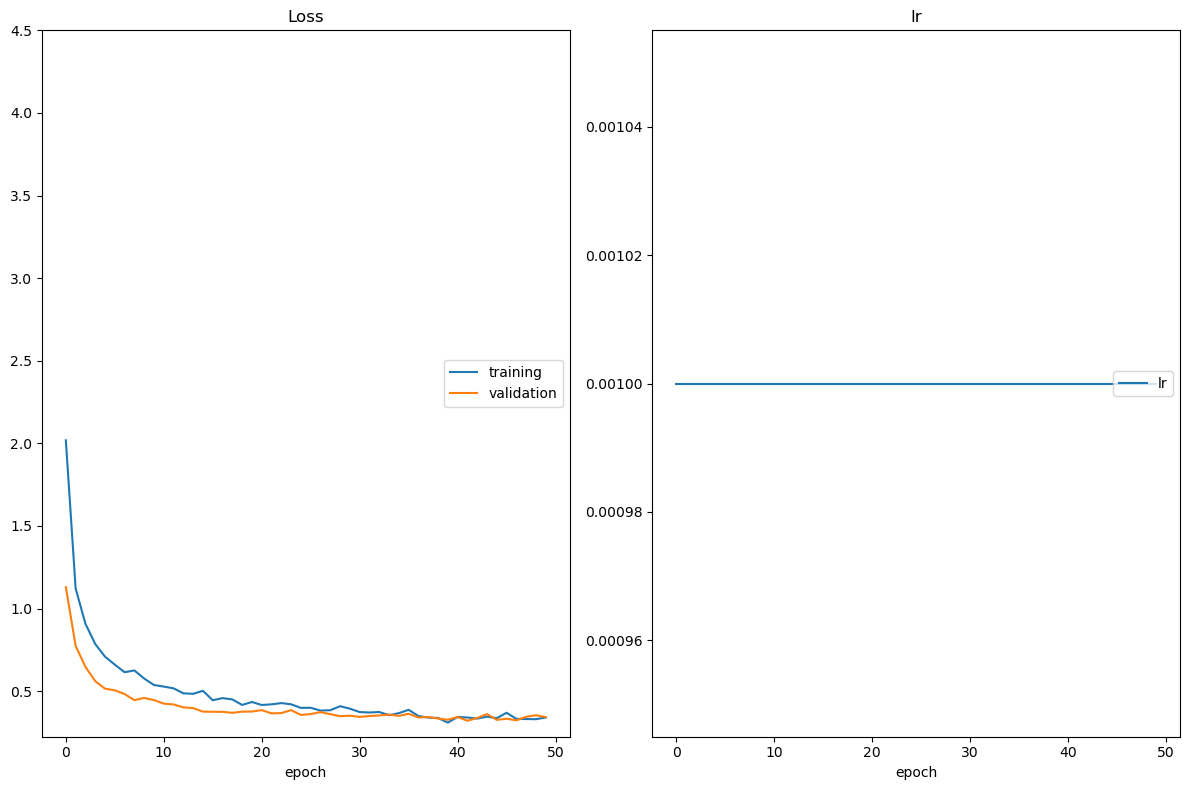

In [8]:
from Data import (get_data_loaders)
from Optimization import get_optimizer, get_loss
from Training import optimize
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name="resnet152", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer152.pt",
    interactive_tracking=True
)

In [9]:
import torch
from Training import one_epoch_test
from TransferModel import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet152", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer152.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 467 groups of parameters


Testing: 100%|██████████████████████████████████| 11/11 [00:23<00:00,  2.18s/it]

Test Loss: 0.404286


Test Accuracy: 88% (608/685)


0.40428649600256567

In [10]:
from PredictorWrapper import Predictor
from Data import compute_mean_and_std, get_data_loaders

# First let's get the class names from our data loaders
class_names = get_data_loaders()["train"].dataset.classes

model_transfer = model_transfer.cpu()
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer152.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported152.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


100%|█████████████████████████████████████████| 685/685 [00:59<00:00, 11.48it/s]
/home/dkafetzis/.conda/envs/deep-learning-landmark-classification/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Accuracy: 0.8890510948905109


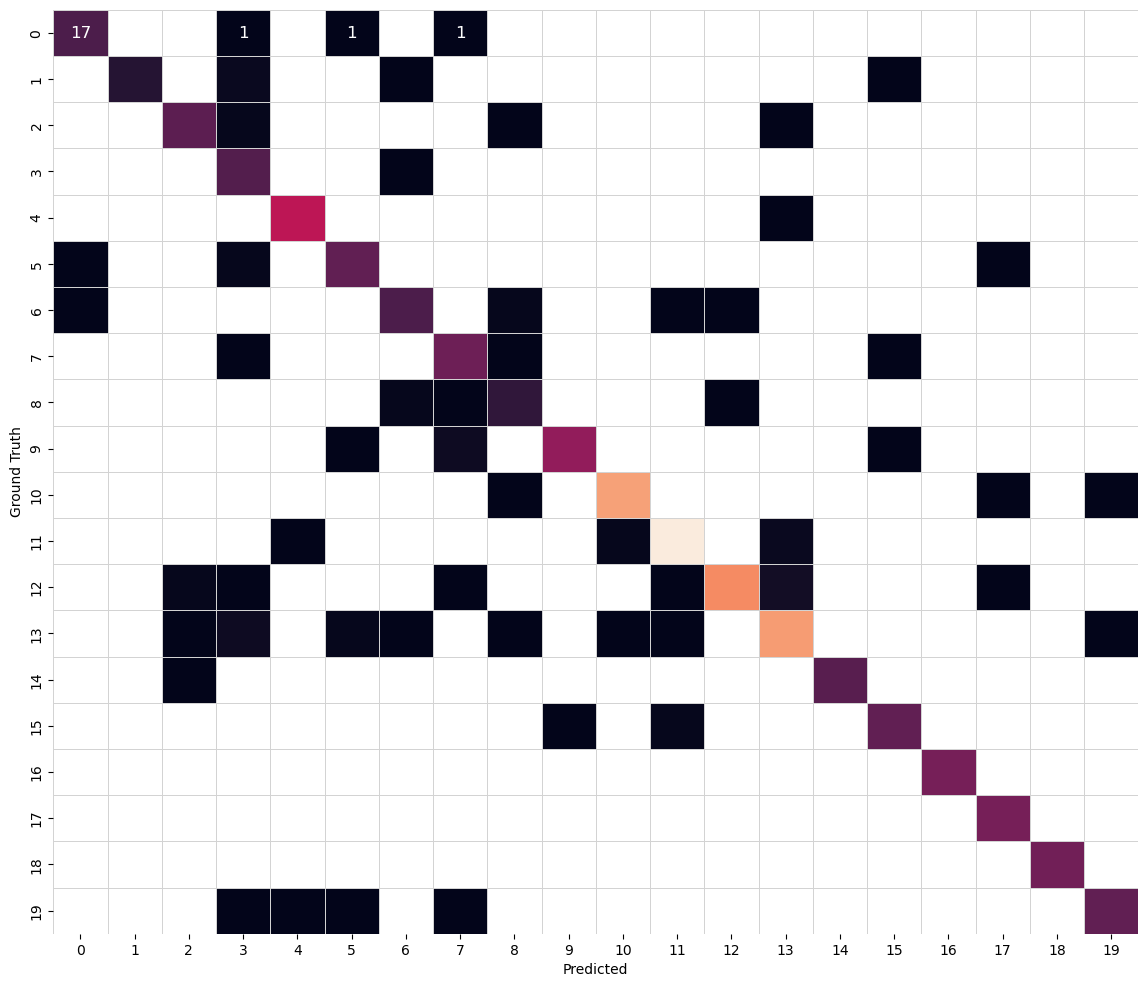

In [11]:
import torch
from PredictorWrapper import predictor_test
from Data import plot_confusion_matrix


model_reloaded = torch.jit.load("checkpoints/transfer_exported152.pt")

pred, truth = predictor_test(get_data_loaders()['test'], model_reloaded)

plot_confusion_matrix(pred, truth)